## Notebook for running Gene Set Enrichment Analysis (GSEA) using gseapy

[gseapy docs](https://gseapy.readthedocs.io/en/latest/index.html)

In [1]:
!date

Fri Dec 10 00:16:54 EST 2021


#### import libraries and set notebook variables

In [2]:
import gseapy
import pandas as pd

In [3]:
# parameters
cohort = 'aging'
assay = 'RNA'

# directories for initial setup
home_dir = '/labshare/raph/datasets/adrd_neuro'
wrk_dir = f'{home_dir}/{cohort}'
results_dir = f'{wrk_dir}/results'

# in files
results_fdr_file = f'{results_dir}/{cohort}.glmmtmb_age_diffs_fdr.csv'

# out files



#### load the gene lists

In [4]:
results_df = pd.read_csv(results_fdr_file)
print(results_df.shape)
display(results_df.head())
# gene_list = ['EIF3KP1', 'KLHL7-DT', 'GDPD3', 'ITGAL', 'LENEP', 'TRIM72', 
#              'MAPT', 'ZSCAN9', 'UBAP1', 'PHF24']
gene_list = ['TBC1D5', 'CCAR2', 'ARIH2', 'FAM45A', 'CAMLG', 'PRCP', 'CCDC58']
print(results_df['tissue'].unique())
# gene_list = list(results_df['feature'].unique())
# region = 'Subventricular zone'
# gene_list = results_df.loc[results_df['tissue'] == region].\
# sort_values(by=['p.value'], ascending=True).head(50)['feature'].to_list()
print(type(gene_list))
print(len(gene_list))
if len(gene_list) < 20:
    print(gene_list)

(17951, 9)


,feature,intercept,estimate,std.error,statistic,p.value,tissue,type,fdr_bh
0,LINC02593,-6.588815,-1.979733,0.640648,-3.090203,0.002000,Middle temporal gyrus,brain_region,0.034653
1,MEGF6,-3.358775,0.310553,0.095130,3.264499,0.001097,Middle temporal gyrus,brain_region,0.024801
2,EPHA8,-4.230609,0.914316,0.303745,3.010140,0.002611,Middle temporal gyrus,brain_region,0.040065
3,ASAP3,-1.604814,0.322646,0.087524,3.686370,0.000227,Middle temporal gyrus,brain_region,0.009831
4,SYTL1,-4.605574,0.691295,0.230334,3.001267,0.002689,Middle temporal gyrus,brain_region,0.040725


['Middle temporal gyrus' 'Putamen' 'Entorhinal cortex'
 'Subventricular zone' 'ExN CUX2 LAMP5' 'Oligodendrocyte-1' 'Astrocyte'
 'ExN RORB' 'ExN RORB THEMIS' 'InN ADARB2 LAMP5' 'InN LHX6 SST'
 'Oligodendrocyte-2' 'InN ADARB2 VIP' 'InN LHX6 PVALB' 'ExN FEZF2' 'OPC'
 'ExN THEMIS' 'ExN CUX2 ADARB2' 'Endothelial' 'Microglia' 'SPN D1-2'
 'SPN D1' 'SPN D2' 'Radial Glia' 'SPN D2-2' 'ExN LAMP5']
<class 'list'>
7
['TBC1D5', 'CCAR2', 'ARIH2', 'FAM45A', 'CAMLG', 'PRCP', 'CCDC58']


In [5]:
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(database='Human')
# print(gene_set_names)

(89, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,regulation of proteasomal ubiquitin-dependent ...,3/102,0.000004,0.000395,0,0,150.712121,1857.474016,CAMLG;ARIH2;CCAR2
1,GO_Biological_Process_2021,negative regulation of proteasomal ubiquitin-d...,2/31,0.000049,0.001633,0,0,275.365517,2734.958038,CAMLG;CCAR2
2,GO_Biological_Process_2021,negative regulation of proteasomal protein cat...,2/38,0.000073,0.001633,0,0,221.744444,2110.994891,CAMLG;CCAR2
3,GO_Biological_Process_2021,negative regulation of ubiquitin-dependent pro...,2/38,0.000073,0.001633,0,0,221.744444,2110.994891,CAMLG;CCAR2
4,GO_Biological_Process_2021,mitochondrial fragmentation involved in apopto...,1/9,0.003146,0.031103,0,0,416.354167,2398.853181,CCAR2


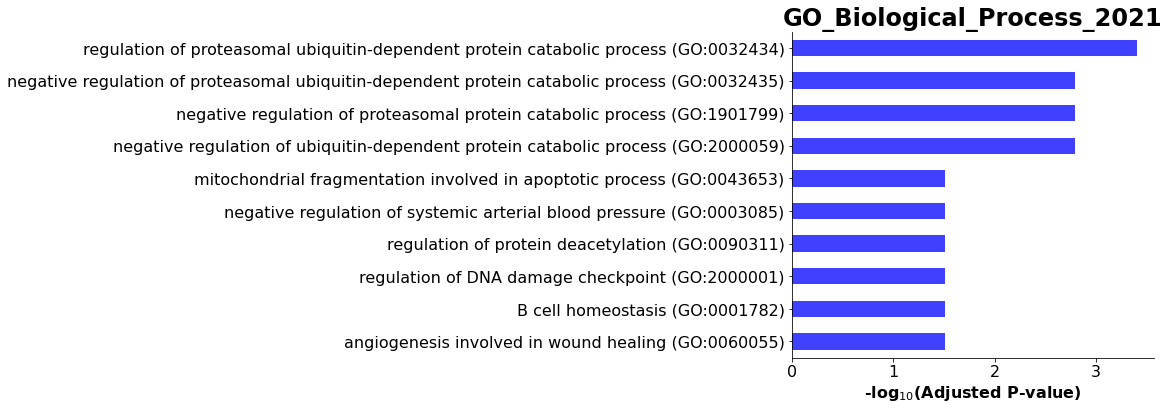

In [12]:
gene_set = 'GO_Biological_Process_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d, title=gene_set, color='blue' )

In [7]:
gene_set = 'GO_Cellular_Component_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

(21, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2021,azurophil granule membrane (GO:0035577),1/58,0.020127,0.151777,0,0,58.292398,227.671976,PRCP
1,GO_Cellular_Component_2021,ficolin-1-rich granule membrane (GO:0101003),1/61,0.021159,0.151777,0,0,55.369444,213.488387,PRCP
2,GO_Cellular_Component_2021,autophagosome (GO:0005776),1/69,0.023905,0.151777,0,0,48.835784,182.336868,TBC1D5
3,GO_Cellular_Component_2021,intrinsic component of endoplasmic reticulum m...,1/121,0.041595,0.151777,0,0,27.601389,87.766241,CAMLG
4,GO_Cellular_Component_2021,integral component of endoplasmic reticulum me...,1/142,0.048661,0.151777,0,0,23.465721,70.934124,CAMLG


'Warning: No enrich terms using library GO_Cellular_Component_2021 when cutoff = 0.05'

In [8]:
gene_set = 'WikiPathways_2019_Human'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

(1, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,WikiPathways_2019_Human,Circadian rhythm related genes WP3594,1/201,0.068274,0.068274,0,0,16.494167,44.274128,CCAR2


'Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.05'

In [9]:
gene_set = 'OMIM_Disease'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

2021-12-10 00:19:28,536 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.5


(0, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


'Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05'

#### we can also probably use this to ID cell clusters
maybe based on CellMarker_Augmented_2021 or Allen_Brain_Atlas_10x_scRNA_2021

In [25]:
# Astrocyte gene marker list
# gene_list = ['SLC1A3', 'GFAP', 'APOE', 'SLC1A2', 'SLC14A1', 'CPE', 'CLU', 'ALDOC', 'FAM19A1', 'AQP4', 'GJB6']

In [10]:
gene_set = 'CellMarker_Augmented_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

(5, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,CellMarker_Augmented_2021,Primitive Endoderm cell:Embryo,1/96,0.033125,0.165624,0,0,34.908772,118.950789,PRCP
1,CellMarker_Augmented_2021,Astrocyte:Embryonic Prefrontal Cortex,1/342,0.113747,0.247112,0,0,9.605083,20.879299,PRCP
2,CellMarker_Augmented_2021,Gonadal Endothelial cell:Fetal Gonad,1/459,0.150023,0.247112,0,0,7.108806,13.485153,PRCP
3,CellMarker_Augmented_2021,Natural Killer T (NKT) cell:Fetal Kidney,3/4543,0.197690,0.247112,0,0,2.552808,4.138245,CAMLG;TBC1D5;ARIH2
4,CellMarker_Augmented_2021,Meiotic Prophase Fetal Germ cell:Fetal Gonad,1/1034,0.310402,0.310402,0,0,3.059051,3.578740,ARIH2


'Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05'

In [11]:
gene_set = 'Allen_Brain_Atlas_10x_scRNA_2021'
enr_res = gseapy.enrichr(gene_list=gene_list,
                         organism='Human',
                         gene_sets=gene_set,
                         description='pathway',
                         cutoff = 0.5)
print(enr_res.results.shape)
display(enr_res.results.head())
gseapy.barplot(enr_res.res2d,title=gene_set)

(51, 10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Allen_Brain_Atlas_10x_scRNA_2021,Human Exc L5 FEZF2 CSN1S1 up,4/1834,0.001966,0.088862,0,0,13.233515,82.469979,FAM45A;CAMLG;PRCP;CCAR2
1,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 104 Sst up,1/20,0.006980,0.088862,0,0,175.210526,869.868918,TBC1D5
2,Allen_Brain_Atlas_10x_scRNA_2021,Human Inh L5-6 PVALB KCNIP2 up,2/409,0.008185,0.088862,0,0,19.249140,92.501834,CCDC58;PRCP
3,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 293 CA3 up,2/417,0.008497,0.088862,0,0,18.870361,89.974977,FAM45A;CCDC58
4,Allen_Brain_Atlas_10x_scRNA_2021,Mouse 108 Pvalb up,1/28,0.009760,0.088862,0,0,123.246914,570.563318,TBC1D5


'Warning: No enrich terms using library Allen_Brain_Atlas_10x_scRNA_2021 when cutoff = 0.05'